In [1]:
import warnings
warnings.filterwarnings("ignore")  # Ignore all warnings

import numpy as np
import matplotlib.pyplot as plt
from agentic_energy.milp.milp_mcp_server import records_to_arrays, solve_daily_milp
from agentic_energy.data_loader import EnergyDataLoader
from agentic_energy.schemas import BatteryParams, DayInputs, EnergyDataRecord, SolveFromRecordsRequest

2025-10-09 17:24:46.900 | DEBUG    | agentics.core.llm_connections:<module>:121 - AGENTICS is connecting to the following LLM API providers:
2025-10-09 17:24:46.900 | DEBUG    | agentics.core.llm_connections:<module>:129 - 0 - Gemini
2025-10-09 17:24:46.900 | DEBUG    | agentics.core.llm_connections:<module>:135 - Please add API keys in .env file to add or disconnect providers.
2025-10-09 17:24:46.908 | DEBUG    | agentics.core.llm_connections:get_llm_provider:29 - No LLM provider specified. Using the first available provider.
2025-10-09 17:24:46.909 | DEBUG    | agentics.core.llm_connections:get_llm_provider:31 - Available LLM providers: ['gemini']. Using 'gemini'


Forecast Engine using device: cpu


In [2]:
italy_obj = EnergyDataLoader(region="ITALY")
italy_data = italy_obj.load_region_data()

2025-10-09 17:24:51.528 | DEBUG    | agentics.core.agentics:from_csv:312 - Importing Agentics of type EnergyDataRecord from CSV /Users/millendroy/Projects/Agentic_Energy/Agentics_for_EnergyArbitrage_Battery/energy_arbitrage/agentic_energy/data/Italy_2023-07-15.csv


In [3]:
italy_data[0]

EnergyDataRecord(timestamps='2023-07-15 00:00:00', prices=105.68, consumption=32.32, year=None, region='ITALY')

In [5]:
len(italy_data)

24

In [4]:
stats= await EnergyDataLoader.get_summary_stats_from_ag(italy_data)
print(stats.pretty_print())

Atype : <class 'agentic_energy.schemas.SummaryStats'>
region: ITALY
total_records: 24
date_range:
  start: '2023-07-15 00:00:00'
  end: '2023-07-15 23:00:00'
prices:
  count: 24
  min: 87.2
  max: 147.51
  avg: 103.89458333333333
  median: 99.6
  p25: 92.47
  p75: 105.965
  std: 17.205209235181908
  var: 296.01922482638884
consumption:
  count: 24
  min: 27.87
  max: 37.19
  avg: 33.27625
  median: 34.66
  p25: 30.8975
  p75: 35.3025
  std: 2.9149068202660158
  var: 8.496681770833334




In [ ]:
capacity = 1.0  # kWh
batterydetails = BatteryParams(
    capacity_kwh=capacity,   # 4-hour energy at 100 kW power: good for diurnal spreads
    soc_init=0.50,        # neutral start
    soc_min=0.0,         # keep 10% buffer for longevity + contingency
    soc_max=1.0,         # avoid top-of-charge stress
    cmax_kw=capacity/4,        # 4-hour duration (capacity/4)
    dmax_kw=capacity/4,        # symmetric charge/discharge
    eta_c=0.95,           # ~92% round-trip when paired with eta_d
    eta_d=0.95,
    soc_target=0.20       # keep headroom to buy when prices dip; adjust by time-of-day policy
)

In [5]:
# now have a for loop to run milp on each day
result = []
day_info =[]
for i in range(len(italy_data)//24):
    print(f"Solving day {i+1} of {len(italy_data)//24}")
    records = SolveFromRecordsRequest(
        battery=batterydetails,
        records=italy_data[i*24:(i+1)*24],
        dt_hours=1.0,
        allow_export=True,
        solver = None,
        solver_opts = None
    )

    prices, demand = records_to_arrays(records.records)
    day = DayInputs(
        prices_buy=prices,
        demand_kw=demand,
        prices_sell=prices,
        allow_export=records.allow_export,
        dt_hours=records.dt_hours
    )
    day_info.append(day)
    result.append(solve_daily_milp(records.battery, day, records.solver, records.solver_opts))

Solving day 1 of 729
Set parameter WLSAccessID


[10/09/25 12:03:16] INFO     Set parameter WLSAccessID                                           ]8;id=844840;file:///Users/millendroy/anaconda3/envs/agentics/lib/python3.11/site-packages/cvxpy/reductions/solvers/qp_solvers/gurobi_qpif.py\gurobi_qpif.py]8;;\:]8;id=768725;file:///Users/millendroy/anaconda3/envs/agentics/lib/python3.11/site-packages/cvxpy/reductions/solvers/qp_solvers/gurobi_qpif.py#160\160]8;;\

Set parameter WLSSecret


                    INFO     Set parameter WLSSecret                                             ]8;id=608926;file:///Users/millendroy/anaconda3/envs/agentics/lib/python3.11/site-packages/cvxpy/reductions/solvers/qp_solvers/gurobi_qpif.py\gurobi_qpif.py]8;;\:]8;id=188268;file:///Users/millendroy/anaconda3/envs/agentics/lib/python3.11/site-packages/cvxpy/reductions/solvers/qp_solvers/gurobi_qpif.py#160\160]8;;\

Set parameter LicenseID to value 2718037


                    INFO     Set parameter LicenseID to value 2718037                            ]8;id=470930;file:///Users/millendroy/anaconda3/envs/agentics/lib/python3.11/site-packages/cvxpy/reductions/solvers/qp_solvers/gurobi_qpif.py\gurobi_qpif.py]8;;\:]8;id=701744;file:///Users/millendroy/anaconda3/envs/agentics/lib/python3.11/site-packages/cvxpy/reductions/solvers/qp_solvers/gurobi_qpif.py#160\160]8;;\

Academic license 2718037 - for non-commercial use only - registered to mi___@columbia.edu


                    INFO     Academic license 2718037 - for non-commercial use only - registered ]8;id=709135;file:///Users/millendroy/anaconda3/envs/agentics/lib/python3.11/site-packages/cvxpy/reductions/solvers/qp_solvers/gurobi_qpif.py\gurobi_qpif.py]8;;\:]8;id=836665;file:///Users/millendroy/anaconda3/envs/agentics/lib/python3.11/site-packages/cvxpy/reductions/solvers/qp_solvers/gurobi_qpif.py#160\160]8;;\
                             to mi___@columbia.edu                                                                 

Solving day 2 of 729
Solving day 3 of 729
Solving day 4 of 729
Solving day 5 of 729
Solving day 6 of 729
Solving day 7 of 729
Solving day 8 of 729
Solving day 9 of 729
Solving day 10 of 729
Solving day 11 of 729
Solving day 12 of 729
Solving day 13 of 729
Solving day 14 of 729
Solving day 15 of 729
Solving day 16 of 729
Solving day 17 of 729
Solving day 18 of 729
Solving day 19 of 729
Solving day 20 of 729
Solving day 21 of 729
Solving day 22 of 729
Solving day 23 of 729
Solving day 24 of 729
Solving day 25 of 729
Solving day 26 of 729
Solving day 27 of 729
Solving day 28 of 729
Solving day 29 of 729
Solving day 30 of 729
Solving day 31 of 729
Solving day 32 of 729
Solving day 33 of 729
Solving day 34 of 729
Solving day 35 of 729
Solving day 36 of 729
Solving day 37 of 729
Solving day 38 of 729
Solving day 39 of 729
Solving day 40 of 729
Solving day 41 of 729
Solving day 42 of 729
Solving day 43 of 729
Solving day 44 of 729
Solving day 45 of 729
Solving day 46 of 729
Solving day 47 of 

In [7]:
len(result)

729

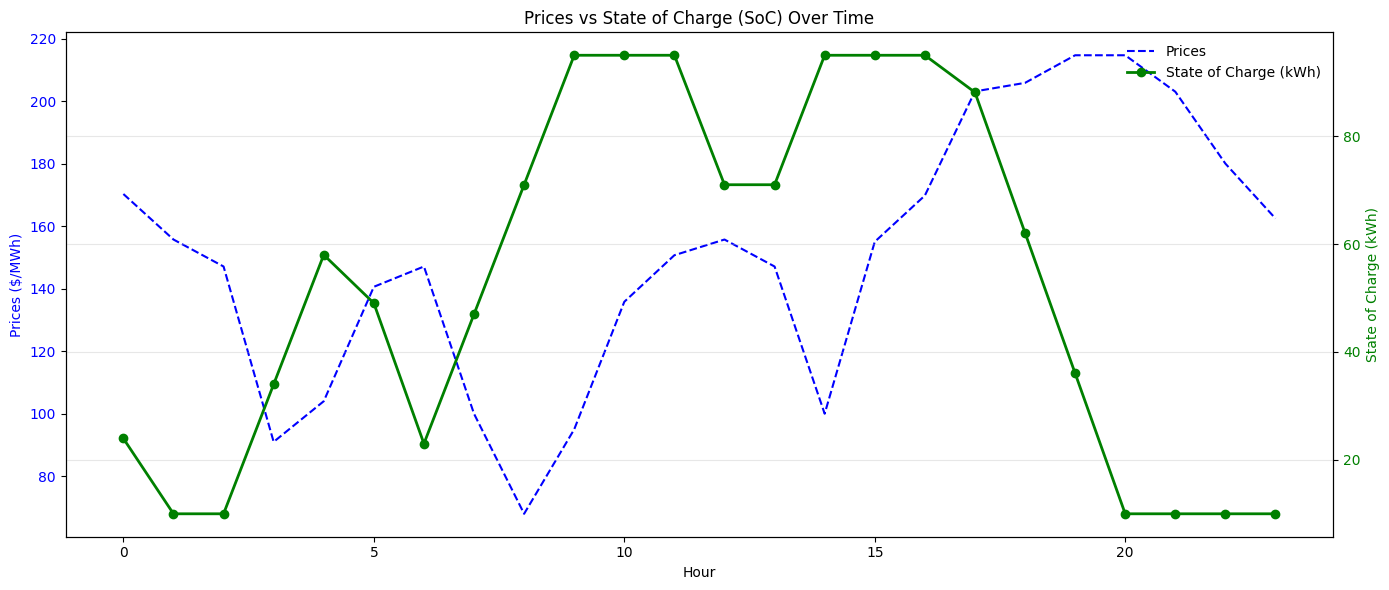

In [10]:
import numpy as np
import matplotlib.pyplot as plt

hours = np.arange(24)
fig, ax1 = plt.subplots(figsize=(14, 6))

# --- Primary axis (Prices) ---
ax1.plot(hours, day_info[0].prices_buy, '--b', label='Prices')
ax1.set_xlabel('Hour')
ax1.set_ylabel('Prices ($/MWh)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# --- Secondary axis (State of Charge) ---
ax2 = ax1.twinx()
ax2.plot(hours, np.array(result[0].soc[1:]) * batterydetails.capacity_kwh,
         '-og', label='State of Charge (kWh)', linewidth=2, markersize=6)
ax2.set_ylabel('State of Charge (kWh)', color='g')
ax2.tick_params(axis='y', labelcolor='g')


# --- Legends ---
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='best', frameon=False)

plt.title('Prices vs State of Charge (SoC) Over Time')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


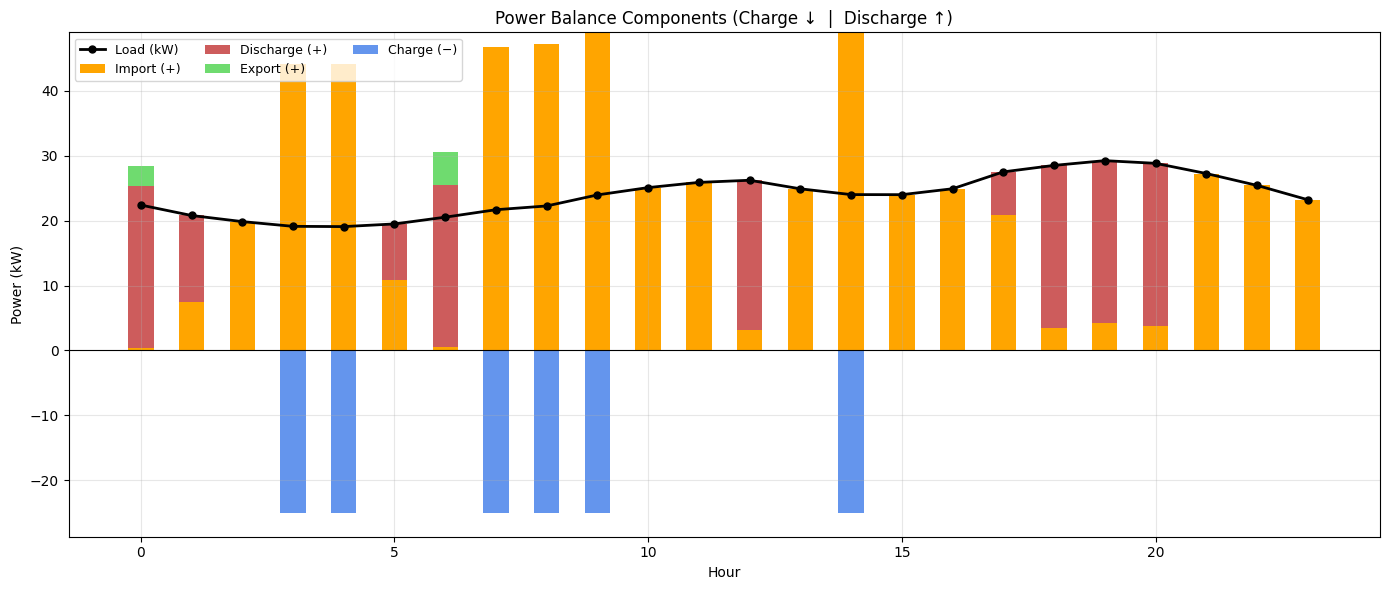

In [16]:
import numpy as np
import matplotlib.pyplot as plt

hours = np.arange(24)

# Data arrays
load = np.array(day_info[0].demand_kw)
charge = np.array(result[0].charge_kw)
discharge = np.array(result[0].discharge_kw)
import_kw = np.array(result[0].import_kw)
export_kw = np.array(result[0].export_kw) if getattr(day_info[0], "allow_export", False) else np.zeros_like(load)

# Flip battery convention for visualization
charge_vis = -charge       # show charge below 0
discharge_vis = discharge  # show discharge above 0

# ---------------------- PLOT ----------------------
fig, ax = plt.subplots(figsize=(14, 6))

# --- positive side stacking (Import + Discharge + Export) ---
# import is base layer
ax.bar(hours, import_kw, width=0.5, color='orange', label='Import (+)')
# discharge stacked on top of import
ax.bar(hours, discharge_vis, width=0.5, bottom=import_kw, color='indianred', label='Discharge (+)')
# export stacked on top (for clear separation)
ax.bar(hours, export_kw, width=0.5, bottom=import_kw + discharge_vis, color='limegreen', alpha=0.7, label='Export (+)')

# --- negative side stacking (Charge only) ---
ax.bar(hours, charge_vis, width=0.5, color='cornflowerblue', label='Charge (−)')

# --- Load as line ---
ax.plot(hours, load, '-ok', linewidth=2, markersize=5, label='Load (kW)')

# Formatting
ax.axhline(0, color='black', linewidth=0.8)
ax.set_ylabel("Power (kW)")
ax.set_xlabel("Hour")
ax.set_title("Power Balance Components (Charge ↓  |  Discharge ↑)")
ax.legend(ncol=3, loc='upper left', fontsize=9)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()


In [20]:
total_objective_value = 0
for day_result in result:
    total_objective_value += day_result.objective_cost
print(f"Total Objective Value over all days: ${total_objective_value:.2f} for {len(result)} days")

Total Objective Value over all days: $113104557.01 for 729 days


In [ ]:

profit = day_info[0].prices_buy*discharge - day_info[0].prices_buy*charge
print(profit)